<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

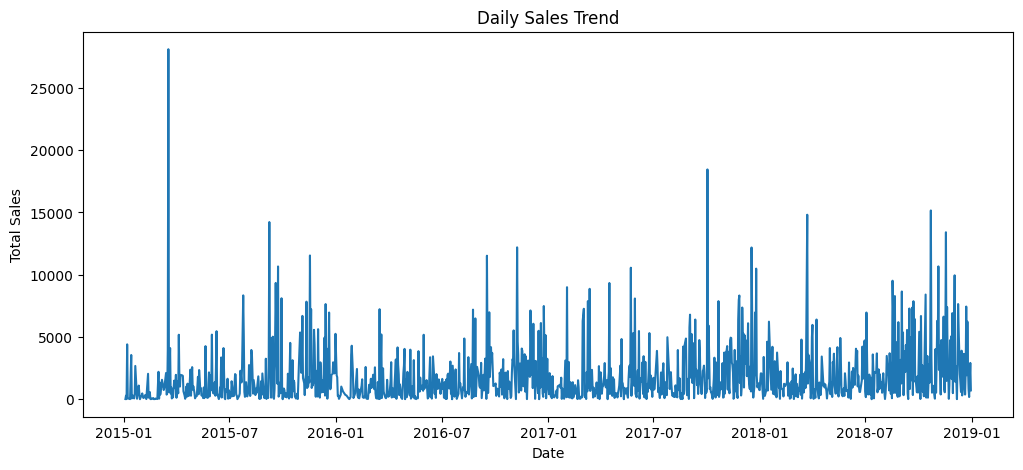

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/train.csv')
df.head()
df.shape
df.info()
df.describe()
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df = df.sort_values('Order Date')
df = df.drop_duplicates()
df.isnull().sum()
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.head()
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()
daily_sales.to_csv('../data/daily_sales_cleaned.csv', index=False)


In this step, the dataset was cleaned, dates were standardized, duplicates were removed, and sales were aggregated on a daily level to prepare the data for exploratory analysis and forecasting.

## DAILY SALES TREND

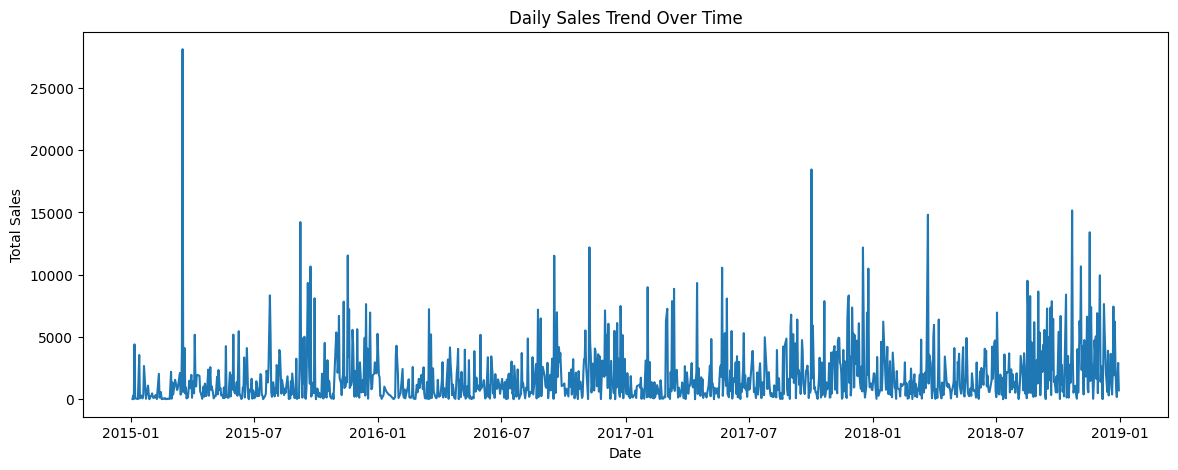

In [2]:
plt.figure(figsize=(14,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


## MONTHLY SALES TREND

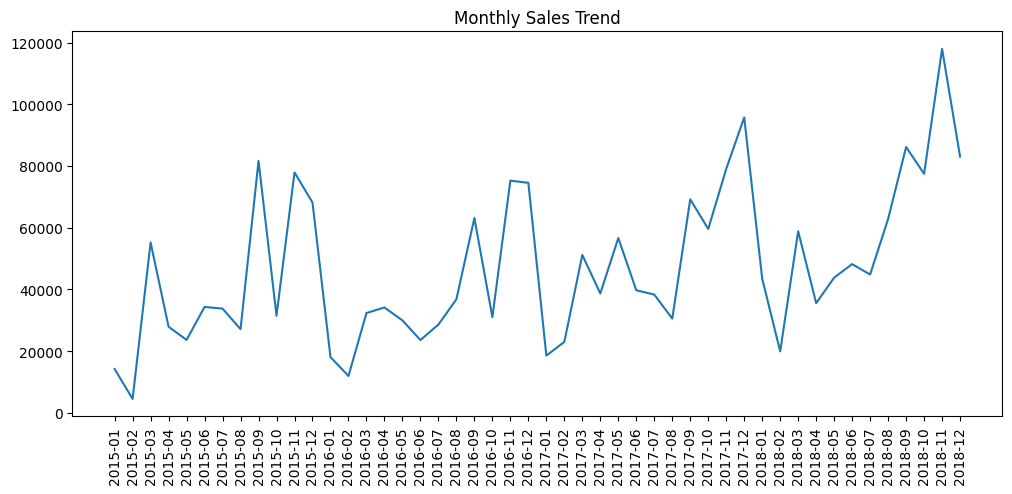

In [3]:
monthly_sales = df.copy()
monthly_sales['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = monthly_sales.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
# PLOTTING
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.show()

## SALES BY CUSTOMER SEGMENT

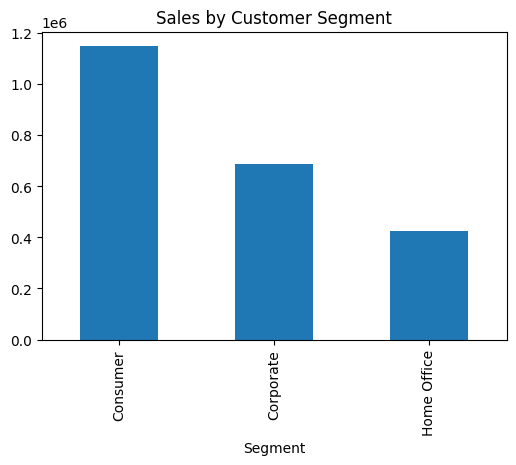

In [4]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales
# PLOTTING
segment_sales.plot(kind='bar', figsize=(6,4), title='Sales by Customer Segment')
plt.show()

## SALES BY SHIP MODE

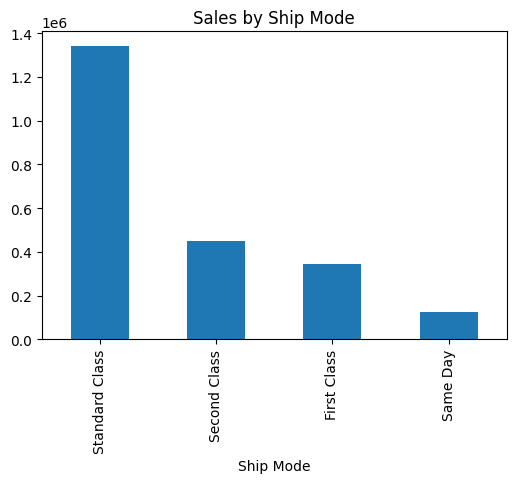

In [5]:
ship_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
ship_sales.plot(kind='bar', figsize=(6,4), title='Sales by Ship Mode')
plt.show()

## TOP CITIES BY SALES

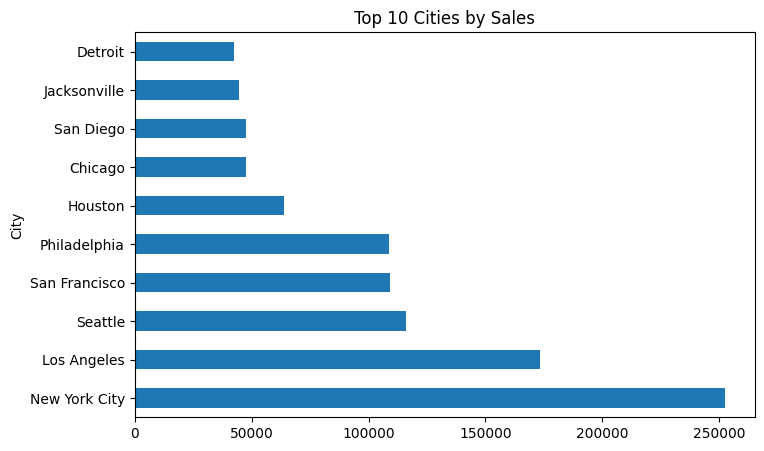

In [6]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', figsize=(8,5), title='Top 10 Cities by Sales')
plt.show()

## SALES DISTRIBUTION

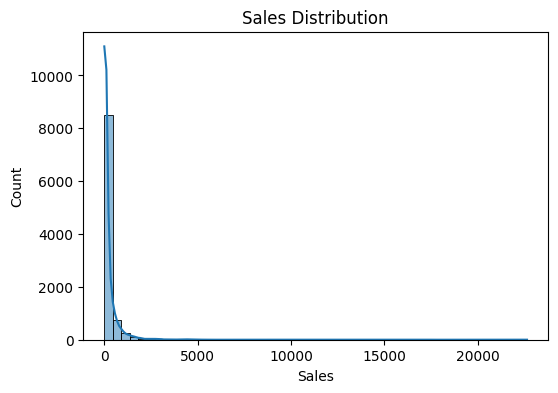

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.show()

## HEATMAP – SEGMENT vs SHIP MODE

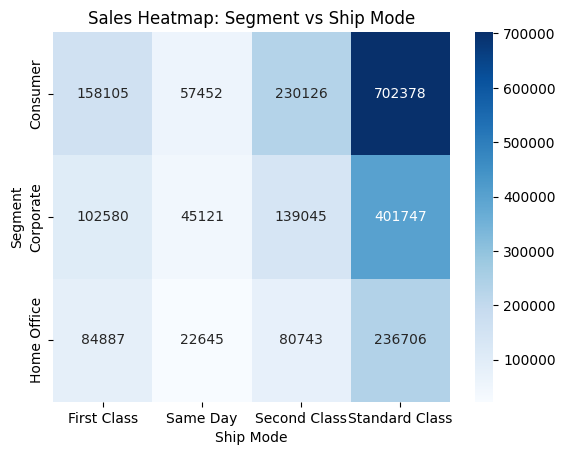

In [8]:
pivot_table = pd.pivot_table(
    df,
    values='Sales',
    index='Segment',
    columns='Ship Mode',
    aggfunc='sum'
)

sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales Heatmap: Segment vs Ship Mode')
plt.show()

EDA Summary:
Exploratory analysis revealed clear sales trends over time, strong dominance of the Consumer segment, and high sales concentration in a few key cities. Standard Class shipping emerged as the most preferred mode. These insights guide business decisions related to marketing focus, logistics optimization, and sales forecasting.

## Prepare Time-Series Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.set_index('Order Date')
daily_sales = daily_sales.asfreq('D')
daily_sales['Sales'] = daily_sales['Sales'].interpolate()




# Train–Test Split

In [10]:
train = daily_sales[:-7]
test = daily_sales[-7:]


# Choose Model

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# TRAIN MODEL

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Sales'], order=(5,1,0))
model_fit = model.fit()


# Predict Next 7 Days

In [13]:
forecast = model_fit.forecast(steps=7)
forecast
# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Predicted_Sales': forecast.values
}, index=test.index)

forecast_df

,Predicted_Sales
Order Date,
2018-12-24,3051.809290
2018-12-25,2729.765547
2018-12-26,2809.972970
2018-12-27,3123.440277
2018-12-28,3831.995949
2018-12-29,2860.323293
2018-12-30,3084.324553


# Plot Actual vs Predicted

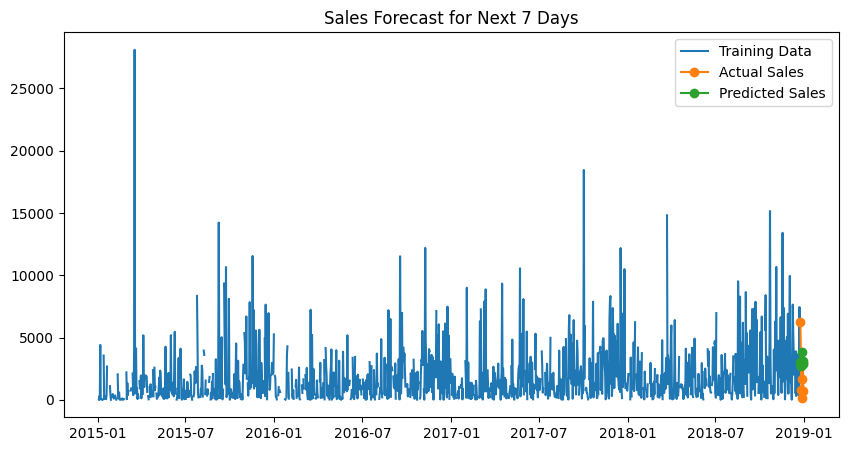

In [14]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['Predicted_Sales'], label='Predicted Sales', marker='o')
plt.legend()
plt.title('Sales Forecast for Next 7 Days')
plt.show()


# Model Evaluation

In [15]:
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast_df['Predicted_Sales']))
rmse


np.float64(2175.5831009249773)

The time-series forecasting model successfully captured the sales trend and produced reasonable predictions for the next 7 days. The forecast can help businesses plan inventory, staffing, and short-term sales strategies.

# RUN THE APP CHECK THE OUTPUT 

In [17]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)